# Customer Spending Score (RFM)

Dataset from Kaggle https://www.kaggle.com/carrie1/ecommerce-data
<br>Set up from https://www.natasshaselvaraj.com/rfm-analysis-in-python/

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\12188\Desktop\EMILY\datasets\ecommerce.csv",encoding='unicode_escape')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df['Total'] = df['Quantity']*df['UnitPrice']

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
m = df.groupby('CustomerID')['Total'].sum()
m = pd.DataFrame(m).reset_index()

In [6]:
m.head()

,CustomerID,Total
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [7]:
freq = df.groupby('CustomerID')['InvoiceDate'].count()
f = pd.DataFrame(freq).reset_index()

In [8]:
f.head()

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [9]:
df['Date']= pd.to_datetime(df['InvoiceDate'])

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [11]:
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1


In [13]:
recent = df[df['rank']==1]

In [14]:
recent['Recency'] = recent['Date'] - pd.to_datetime('2010-12-01 08:26:00')

C:\Users\12188\AppData\Local\Temp/ipykernel_10972/3893839999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['Recency'] = recent['Date'] - pd.to_datetime('2010-12-01 08:26:00')


In [15]:
recent.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date,rank,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,1,0 days
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1,0 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,1,0 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1,0 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,1,0 days


In [16]:
def recency(recency):
    res = str(recency).split(' ')[0]
    return(int(res))
    
recent['Recency'] = recent['Recency'].apply(recency)

C:\Users\12188\AppData\Local\Temp/ipykernel_10972/3595251998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['Recency'] = recent['Recency'].apply(recency)


In [17]:
recent = recent[['CustomerID','Recency']]
recent = recent.drop_duplicates()

In [18]:
recent.head()

,CustomerID,Recency
0,17850.0,0
9,13047.0,0
26,12583.0,0
46,13748.0,0
65,15100.0,0


In [19]:
finaldf = f.merge(m,on='CustomerID').merge(recent,on='CustomerID')

finaldf.rename(columns={'InvoiceDate': 'Frequency', 'Total': 'Monetary Value'}, inplace=True)

finaldf.head()

,CustomerID,Frequency,Monetary Value,Recency
0,12346.0,2,0.00,48
1,12347.0,182,4310.00,6
2,12348.0,31,1797.24,15
3,12349.0,73,1757.55,355
4,12350.0,17,334.40,63


In [20]:
finaldf.describe()

,CustomerID,Frequency,Monetary Value,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,93.053294,1898.459701,147.687328
std,1722.390705,232.471608,8219.345141,118.382894
min,12346.000000,1.000000,-4287.630000,0.000000
25%,13812.750000,17.000000,293.362500,42.000000
50%,15300.500000,42.000000,648.075000,120.000000
75%,16778.250000,102.000000,1611.725000,258.000000
max,18287.000000,7983.000000,279489.020000,373.000000


In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:>

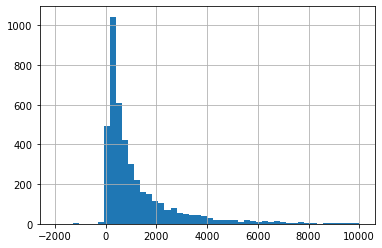

In [32]:
finaldf['Monetary Value'].hist(bins=50, range=(-2000,10000))

<AxesSubplot:>

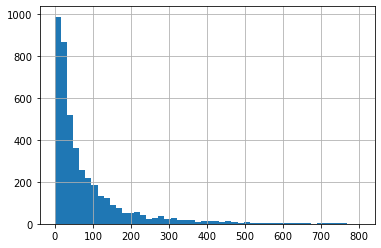

In [35]:
finaldf['Frequency'].hist(bins=50,range=(0,800))

<AxesSubplot:>

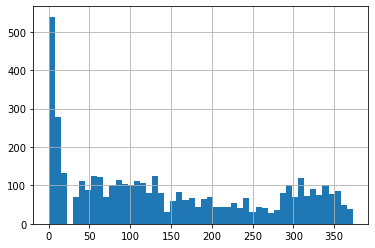

In [25]:
finaldf['Recency'].hist(bins=50)

<AxesSubplot:>

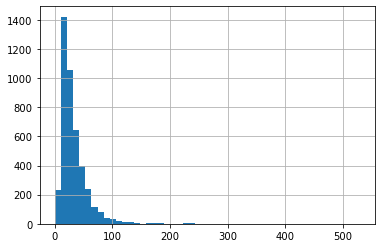

In [42]:
#square root transformation

sqrt_M = finaldf['Monetary Value']**(.5)
sqrt_M.hist(bins=50)

<AxesSubplot:>

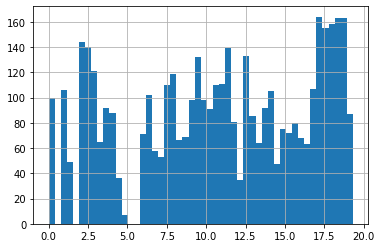

In [43]:
#square root transformation

sqrt_R = finaldf['Recency']**(.5)
sqrt_R.hist(bins=50)

<AxesSubplot:>

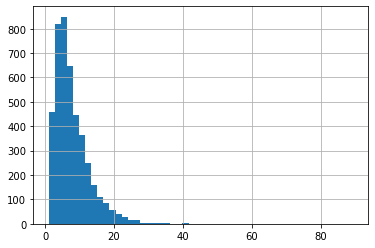

In [44]:
#square root transformation

sqrt_F = finaldf['Frequency']**(.5)
sqrt_F.hist(bins=50)

In [53]:
import numpy as np

<AxesSubplot:>

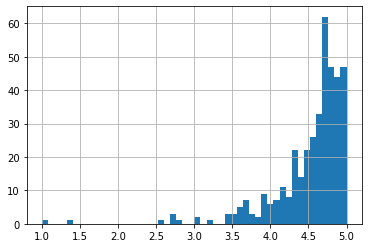

In [59]:
#log transformation

log_M=np.log(finaldf['Monetary Value'])
log_M.hist(bins=50, range=(1,5))

<AxesSubplot:>

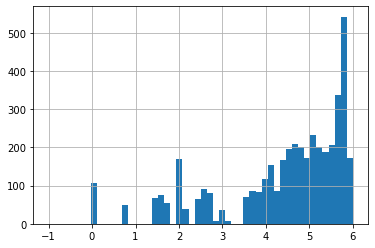

In [64]:
#log transformation

log_R=np.log(finaldf['Recency'])
log_R.hist(bins=50,range=(-1,6))

<AxesSubplot:>

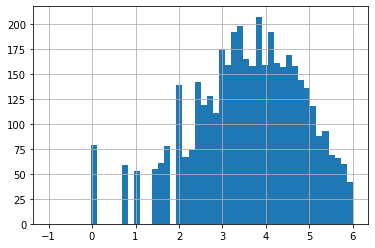

In [65]:
#log transformation

log_F=np.log(finaldf['Frequency'])
log_F.hist(bins=50,range=(-1,6))

In [20]:
from sklearn.preprocessing import StandardScaler

In [39]:
col_names = ['Frequency', 'Monetary Value', 'Recency']
features = finaldf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Frequency,Monetary Value,Recency
0,-0.391720,-0.231001,-0.842172
1,0.382657,0.293432,-1.196993
2,-0.266959,-0.012316,-1.120960
3,-0.086271,-0.017146,1.751405
4,-0.327188,-0.190312,-0.715450


Combined RFM assuming the client puts equal weight on each aspect of customer value

scaled_features['Aggregate']= scaled_features['list(scaled_features.columns)].sum(axis=1)

scaled_features.head()

In [31]:
scaled_features['Aggregate'] = scaled_features['Frequency']*0.333 + scaled_features['Monetary Value']*0.333 + scaled_features['Recency']*0.333

scaled_features.head()

,Frequency,Monetary Value,Recency,Aggregate
0,-0.391720,-0.231001,-0.842172,-0.487809
1,0.382657,0.293432,-1.196993,-0.173461
2,-0.266959,-0.012316,-1.120960,-0.466278
3,-0.086271,-0.017146,1.751405,0.548780
4,-0.327188,-0.190312,-0.715450,-0.410572


In [28]:
scaled_features['Aggregate'] = ((scaled_features['Frequency']*0.333 + scaled_features['Monetary Value']*0.333 
                                + scaled_features['Recency']*0.333)*50) + 50

scaled_features.head()

,Frequency,Monetary Value,Recency,Aggregate
0,-0.391720,-0.231001,-0.842172,25.609541
1,0.382657,0.293432,-1.196993,41.326937
2,-0.266959,-0.012316,-1.120960,26.686081
3,-0.086271,-0.017146,1.751405,77.439003
4,-0.327188,-0.190312,-0.715450,29.471384


In [23]:
cvalue = pd.DataFrame(finaldf['CustomerID'])

In [24]:
cvalue['Aggregate'] = scaled_features['Aggregate']
#cvalue.merge(scaled_features, left_index=True, right_index=True)

In [25]:
cvalue.head()

,CustomerID,Aggregate
0,12346.0,-1.464892
1,12347.0,-0.520905
2,12348.0,-1.400235
3,12349.0,1.647988
4,12350.0,-1.232950


from bisect import bisect_left

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

https://www.entechin.com/find-nearest-value-list-python/